##### Below is a template for Asana's early career data science take-home assessment. Although we encourage candidates to use a similar format as below, feel free to make changes as needed!

### Data Ingestion

In [2]:
# How to read the data files in Python

import pandas as pd

users = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_users-intern.csv")

user_engagement = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_user_engagement-intern.csv")

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com


- object_id - primary key
- creation_time - datetime
- name - string
- email - string
- creation source - string (categorical)
- last session creation time - datetime
- opted_in_to_mailing_list - boolean
- enabled_for_marketing_drip - boolean
- org_id - categorical
- invited_by_user - integer (categorical)
- invited_by_user_id - integer (categorical)
- email_domain (categorical)


In [21]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
email_domain                   object
dtype: object

In [4]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [22]:
user_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

Identifier Columns

Are columns that should be primary keys actually unique? If not, how will you handle duplicate values (keep first value, keep last value, etc.)?

In [11]:
print(users.object_id.is_unique) #is indeed a primary key


True
False


In [19]:
#range of values of visited - only 1 - so we can remove this column
print(max(user_engagement.visited))
print(min(user_engagement.visited))

1
1


In [24]:
import matplotlib.pyplot as plt

Numerical Columns

Plot a histogram of the column values to examine the distribution. Does the distribution look normal/uniform/bimodal/something else?
Are there outliers? For analytics tasks, I generally wouldn’t remove outliers at first, but it’s good to note that they are present.
Are there values that don’t make sense in the context of the problem (e.g. a person with a height of 12 feet, negative $ amounts in some applications)?
Are there missing values? Handling missing data could be a whole post on its own, but this article is a good resource for how to think about it.

Categorical Columns

Compute the frequency of each category. What are the most/least common categories?
Are there categories that could be merged together with some simple text manipulation (e.g. same category name but different cases, clear typos)?
Are there values that don’t make sense in the context of the problem (e.g. order from Russia when you know all orders should be from the US)?
Are there missing values? Handling missing data could be a whole post on its own, but this article is a good resource for how to think about it.

In [38]:
users.invited_by_user_id.value_counts()
print(users.invited_by_user_id.isnull().sum())

5583


<Axes: xlabel='invited_by_user_id'>

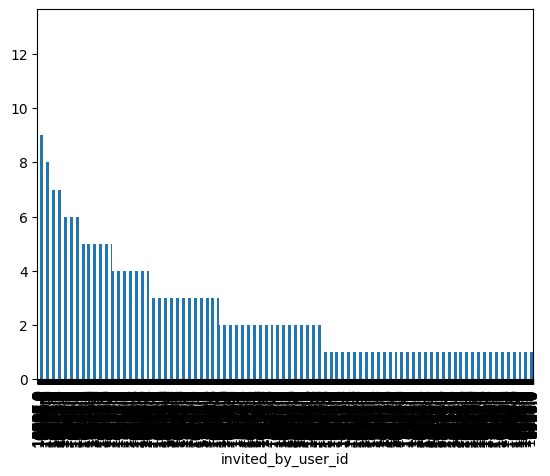

In [75]:
users['invited_by_user_id'].value_counts().plot(kind='bar')


<Axes: xlabel='creation_source'>

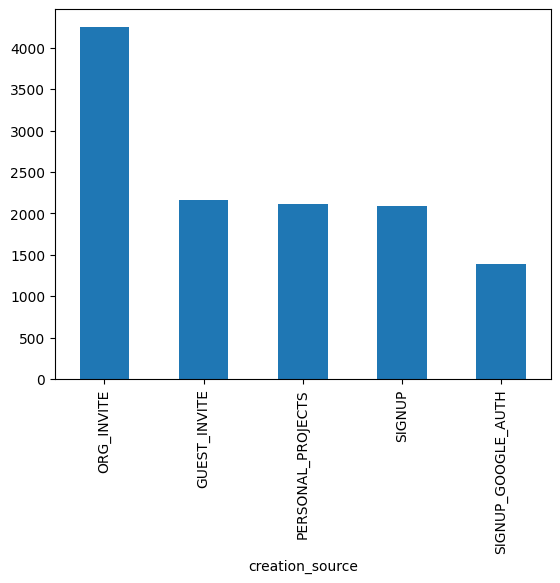

In [27]:
users['creation_source'].value_counts().plot(kind='bar')


In [76]:
print(users.creation_source.isnull().sum())

0


<Axes: xlabel='email_domain'>

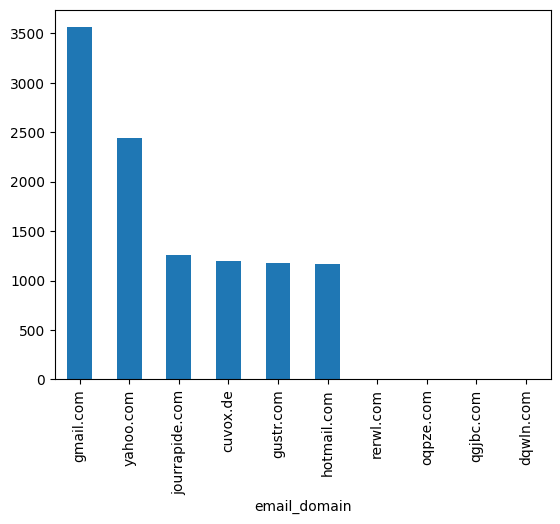

In [31]:
users['email_domain'].value_counts().head(10).plot(kind='bar')

Timestamp Columns

Are there gaps in the time series (e.g. missing a whole day or multiple days, days with shockingly low volume)?
Are there missing values? Handling missing data could be a whole post on its own, but this article is a good resource for how to think about it.

In [40]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])



In [48]:
#range of dates
print(max(users.creation_time))
print(min(users.creation_time))

2014-05-30 23:59:00
2012-05-31 00:43:00


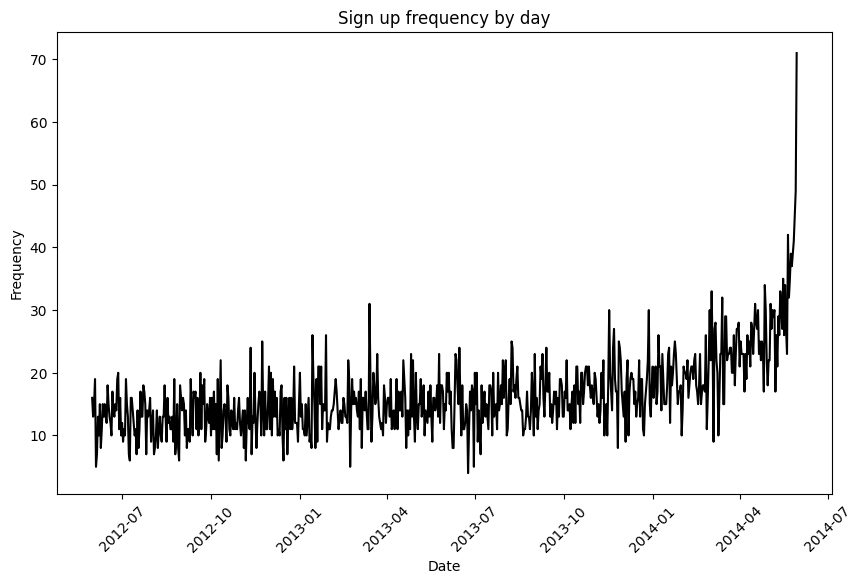

In [73]:
#plot creation_time

# Group by date-time and count the frequency
frequency = users.groupby(users['creation_time'].dt.date)['creation_time'].size()

# Create a bar plot
plt.figure(figsize=(10, 6))
frequency.plot(color='black', linestyle='-')
plt.title('Sign up frequency by day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [67]:
max(users['creation_time'].dt.date.value_counts())

71

In [56]:
#no null values
users.creation_time.isnull().sum()

0

In [54]:
#users.last_session_creation_time not a useful column - should be dropped from the df 
print("min value: ", min(users.last_session_creation_time), "\nmax_value: ", max(users.last_session_creation_time))

min value:  1970-01-01 00:00:01.338452406 
max_value:  1970-01-01 00:00:01.402066730


In [63]:
#No significant gap in the time series - maximum gap is 19 hours and 18 minutes

from datetime import datetime, timedelta

creation_time_analysis = pd.DataFrame(users)

# Set 'timestamp' as the index
creation_time_analysis.set_index('creation_time', inplace=True)

# Sort the DataFrame by the index (timestamp)
creation_time_analysis.sort_index(inplace=True)

# Calculate time gaps between consecutive timestamps
time_diff = creation_time_analysis.index.to_series().diff()

# Define a threshold for gap detection (e.g., 15 minutes)
gap_threshold = timedelta(minutes=720)

# Find gaps exceeding the threshold
gaps = time_diff[time_diff > gap_threshold]

if not gaps.empty:
    print("Gaps in the time series:")
    print(gaps)
else:
    print("No significant gaps in the time series.")

Gaps in the time series:
creation_time
2012-07-26 22:08:00   0 days 15:36:00
2012-08-05 05:48:00   0 days 14:42:00
2012-08-29 17:02:00   0 days 19:18:00
2012-12-31 04:25:00   0 days 15:33:00
2013-07-07 21:17:00   0 days 14:48:00
Name: creation_time, dtype: timedelta64[ns]


Joining Tables

Once you’ve cleaned your data and need to merge tables together, you’ll want to be very thoughtful about join types. Before joining 2 tables, think about what the output should look like (e.g. should a user have a single order or multiple orders? should users with no orders be included?). If you’ve thought about what the output should look like before joining the data, then you can validate whether the results match your expectations and debug your code if necessary.

### Data Exploration and Cleaning

### 1) Calculating Adoption Rate

We define an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period. Because we believe that adopted users are more likely to be successful at using Asana in the long term than those that are not adopted, we
want to know what things are likely indicators of future adoption. 

### 2) Methodology

##### 2a) Writeup associated with methodology

### 3) What Factors Predict User Adoption?

Because we believe that adopted users are more likely to be successful at using Asana in the long term than those that are not adopted, we want to know what things are likely indicators of future adoption. With this in mind, we'd like you to identify which factors predict user adoption. Applicants generally take on a modeling approach to answer this question, but you may choose whatever method you prefer.

##### 3a) Writeup associated with what factors predict user adoption?

### 4) Additional Commentary (Optional)